<a href="https://colab.research.google.com/github/BHUVANAN8/Projects/blob/main/Wine_quality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SUPERVISED MACHINE LEARNING**

**WINE QUALITY PREDICTION :**
The aim of this project is to predict the quality of the wine on a scale of 0–10 on given a set of features as inputs. The dataset used is Wine Quality Data set from Kaggle API.

**Importing dependencies**

In [ ]:
iimport numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
print('setup complete')

setup complete


**Data collection**

In [ ]:
#load the dataset to pandas dataframe
wine_data = pd.read_csv('/content/winequality-red.csv')
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
#see the no of rows and column
wine_data.shape

(1599, 12)

In [ ]:
#first 5 rows and columns 
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#missing values 
wine_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Data Analysis and Data Visualization**

In [ ]:
#statistical measures
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<Figure size 360x360 with 0 Axes>

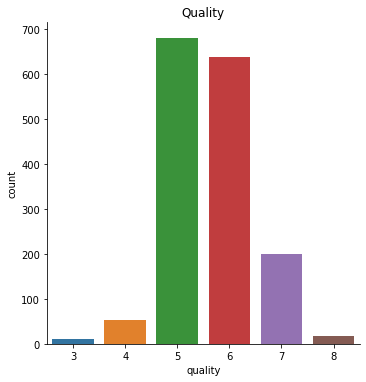

In [ ]:
#catplot of 'quality' variable
plt.figure(figsize=(5,5))
sns.catplot(x='quality', data = wine_data, kind = 'count')
plt.title('Quality')
plt.show()

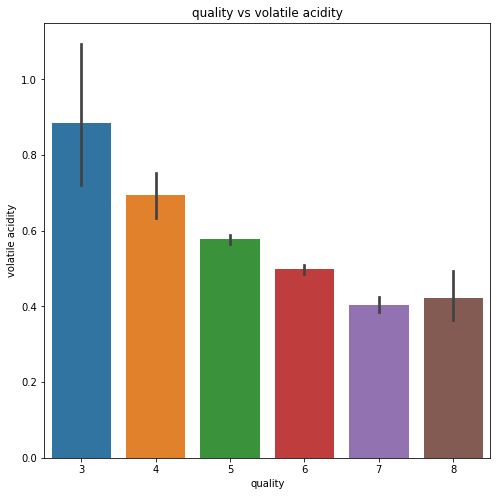

In [ ]:
#volatile acidity vs quality
plt.figure(figsize=(8,8))
sns.barplot(x = 'quality' , y ='volatile acidity', data = wine_data)
plt.title('quality vs volatile acidity')
plt.show()
#thus volatile acidity is inversly proportional to quality


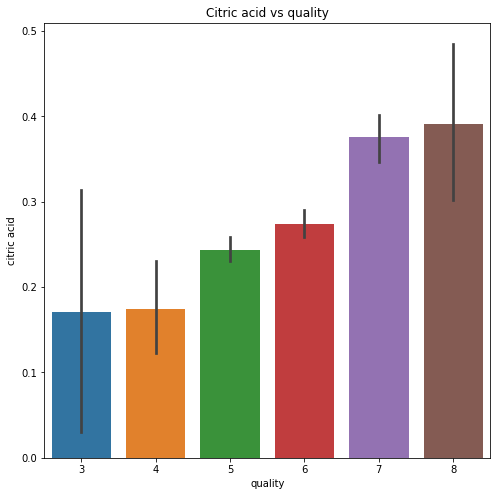

In [ ]:
#citric acid vs quality
plt.figure(figsize=(8,8))
sns.barplot(x = 'quality' , y ='citric acid', data = wine_data)
plt.title('Citric acid vs quality')
plt.show()
#thus citric acid is directly proportional to quality


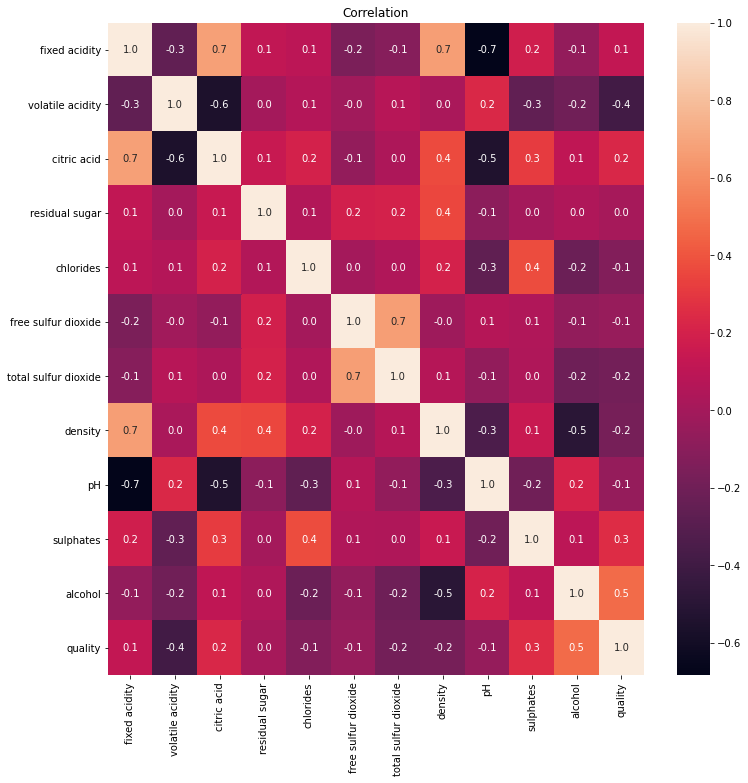

In [ ]:
#find the correlation between the variable
correlation = wine_data.corr()
plt.figure(figsize=(12,12))
sns.heatmap(correlation, cbar =True, annot =True, fmt = '.1f')
plt.title('Correlation')
plt.show()

In [ ]:
#separate the feature variable and target variable
X = wine_data.drop('quality', axis=1)
print(X)

      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0               7.4             0.700         0.00  ...  3.51       0.56      9.4
1               7.8             0.880         0.00  ...  3.20       0.68      9.8
2               7.8             0.760         0.04  ...  3.26       0.65      9.8
3              11.2             0.280         0.56  ...  3.16       0.58      9.8
4               7.4             0.700         0.00  ...  3.51       0.56      9.4
...             ...               ...          ...  ...   ...        ...      ...
1594            6.2             0.600         0.08  ...  3.45       0.58     10.5
1595            5.9             0.550         0.10  ...  3.52       0.76     11.2
1596            6.3             0.510         0.13  ...  3.42       0.75     11.0
1597            5.9             0.645         0.12  ...  3.57       0.71     10.2
1598            6.0             0.310         0.47  ...  3.39       0.66     11.0

[1599 rows x 11

In [ ]:
#binarize the target variable and count
Y =wine_data['quality'].apply(lambda y:1 if y>=6 else 0)
print(Y.value_counts())

1    855
0    744
Name: quality, dtype: int64


**Train_test_split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state =3)
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


**Build a model using Random Forest classifier**

Here am using Random forest classifier and Decision tree classifier. After the observation compared to decision tree classifier , random forest classifier gives more accuracy for the given dataset.

In [ ]:
#RANDOMFORESTCLASSIFIER
model_1= RandomForestClassifier()
model_1.fit(X_train, Y_train)
X_test_predictions =model_1.predict(X_test)
test_data_accuracy=accuracy_score(Y_test, X_test_predictions)
print('Accuracy :' , test_data_accuracy)


Accuracy : 0.84375


In [ ]:
#DECISIONTREECLASSIFIER
model_2= DecisionTreeClassifier()
model_2.fit(X_train, Y_train)
X_test_predictions =model_2.predict(X_test)
test_data_accuracy=accuracy_score(Y_test, X_test_predictions)
print('Accuracy :' , test_data_accuracy)


Accuracy : 0.7375


**Building a Predictive System**

In [ ]:
input_data = (5.9, 0.550,	0.10,	2.2,	0.062,	39.0,	51.0,	0.99512,	3.52,	0.76,	11.2) 
#input  the data to numpy array
input_data_np = np.asarray(input_data)
#reshape the input data as we are predicting the target variable for only one instance
input_data_reshape = input_data_np.reshape(1,-1)
prediction = model_1.predict(input_data_reshape)
print(prediction)

if(prediction[0]==1):
  print('wine quality is good')
else:
  print('wine quality is bad')

[1]
wine quality is good


# New Section

# New Section

# New Section